# Pandas 1

In [1]:
import os
import json
from json import JSONDecodeError

import pandas as pd # Module naming abbreviation

### Review - Files & exception handling
- FileNotFoundError
- FileExistsError
    - ironically, used for directories, when using `os.mkdir()`
- JSONDecodeError
    - when json file has incorrect format

### Review 1

In [2]:
# let's figure out how to handle a command to open a file that does not exist

path = input("enter the name of the file to open:")
try:
    f = open(path, "r")  # "r" is for reading, but is the default
    d = f.read()
    print(d)
    f.close()
except FileNotFoundError as e:
    print(type(e))
    print(path, "could not be opened")

enter the name of the file to open:samplefile.txt
<class 'FileNotFoundError'>
samplefile.txt could not be opened


### Review 2

In [3]:
# Accidental execution of code containing mkdir twice

try:
    os.mkdir('new_test_dir')
except FileExistsError:
    print("Directory already exists!")

f = open(os.path.join('new_test_dir', 'out.txt'), 'w')
f.write('hi')
f.close()

In [4]:
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

### Review 3

In [5]:
# JSONDecodeError - requires import

# Steps:
# Get output of listdir
# Check for files with json extension
# Read each file's contents

files = os.listdir(".")

for some_file in files:
    if some_file.endswith(".json"):
        print(some_file)
        try:
            read_json(some_file)
        except JSONDecodeError as e:
            continue # move on to reading next file

6.json
1.json
2.json
3.json
4.json
5.json


## Learning Objectives:
- Create a pandas Series from a list or from a dict
- Use Series methods max, min, mean, median, mode, quantile, value counts
- Extract elements from a Series using Boolean indexing
- Access Series members using .loc, .iloc, .items, and slicing
- Perform Series element-wise operations

### What is pandas?
- pandas is a package of tools for doing Data Science
- pandas is installed on top of Python (https://en.wikipedia.org/wiki/Pandas_(software))
    - comes with Anaconda installation
    - If for some reason, you don't have pandas installed, run the following command in terminal or powershell
        <pre> pip install pandas </pre>

## pandas Series
- combination of dict and list
- can be created either from a python `list` or `dict`
- Terminology:
    - index (equivalent to key in python `dict`)
    - integer position (equivalent to index in python `list`)

## Create a series from a dict

In [6]:
# create a series from a dict
d = {"one": 7, "two": 8, "three": 9}
d

{'one': 7, 'two': 8, 'three': 9}

In [7]:
s = pd.Series(d)
s

one      7
two      8
three    9
dtype: int64

In [8]:
type(s)

pandas.core.series.Series

In [9]:
s = pd.Series({"one": 7, "two": 8, "three": 9}) # equivalent to the above example
s

one      7
two      8
three    9
dtype: int64

In [10]:
# IP  index    value
# 0   one      7
# 1   two      8
# 2   three    9

# dtype: int64

## Accessing values with index (.loc[...])

In [11]:
d

{'one': 7, 'two': 8, 'three': 9}

In [12]:
# dict access with key
d["one"]

7

In [13]:
s.loc["one"]

7

In [14]:
s.loc["two"]

8

## Accessing values with integer position (.iloc[...])

In [15]:
s

one      7
two      8
three    9
dtype: int64

In [16]:
s.iloc[0]

7

In [17]:
s.iloc[-1]

9

## Create a series from a list

In [18]:
# Series created from a list
num_list = [100, 200, 300]
s = pd.Series(num_list)
s

0    100
1    200
2    300
dtype: int64

In [19]:
# IP  index value
# 0   0      100
# 1   1      200
# 2   2      300
# dtype: int64

In [20]:
print(s.loc[1])
print(s.iloc[1])

200
200


## Slicing series using integer positions

In [21]:
letters_list = ["A", "B", "C", "D"]
letters = pd.Series(letters_list)
letters

0    A
1    B
2    C
3    D
dtype: object

In [22]:
# list slicing
print(letters_list)
sliced_letter_list = letters_list[2:]
sliced_letter_list

['A', 'B', 'C', 'D']


['C', 'D']

Sliced Series retains original Series index, whereas integer positions are renumbered.

In [23]:
print(letters)
sliced_letters = letters.iloc[2:]
sliced_letters

0    A
1    B
2    C
3    D
dtype: object


2    C
3    D
dtype: object

In [24]:
# Note: integer positions get renumbered, whereas indexes do not.

# IP  Index  values
# 0   2       C
# 1   3       D
# dtype: object

In [25]:
print(sliced_letters.loc[2])
print(sliced_letters.iloc[0])

C
C


## Slicing series using index

In [26]:
s = pd.Series({"one": 7, "two": 8, "three": 9})
s

one      7
two      8
three    9
dtype: int64

In [27]:
#slicing with indexes
s.loc["two":]

two      8
three    9
dtype: int64

## Statistics on Series
- Use Series methods max, min, mean, median, mode, quantile, value counts

In [28]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
scores

0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

In [29]:
print(scores.max())
print(scores.idxmax())

92
6


In [30]:
print(scores.min())
print(scores.idxmin())

19
2


In [31]:
scores.count()

11

In [32]:
scores.mean()

50.54545454545455

In [33]:
scores.std()

26.051347897426098

In [34]:
scores.median()

47.0

In [35]:
# there could be multiple modes, so mode returns a Series
scores.mode()

0    23
1    47
dtype: int64

#### Quantile function
- enables to calculate percentiles
- takes as argument a float value between 0 and 1
- defaults to 50th percentile

In [36]:
scores.quantile(), scores.median()

(47.0, 47.0)

In [37]:
scores.quantile(0.75) # 75th percentile

72.5

In [38]:
# 5-percentile summary
print(scores.quantile([0, 0.25, 0.5, 0.75, 1.0]))

0.00    19.0
0.25    27.5
0.50    47.0
0.75    72.5
1.00    92.0
dtype: float64


#### value_counts()
- Series value_counts() creates a series where the key is the data, and the value is its count in the Series
- by default return value Series is ordered by descending order of the counts (values)

In [39]:
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
age_counts = ages.value_counts()
age_counts

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

## Sorting
- sort_index()
- sort_values()

In [40]:
age_counts.sort_index()

17    1
18    2
19    4
20    6
21    3
22    1
23    2
24    1
25    1
35    1
dtype: int64

In [41]:
age_counts.sort_values()

17    1
24    1
25    1
35    1
22    1
18    2
23    2
21    3
19    4
20    6
dtype: int64

## Series bar chart

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count')]

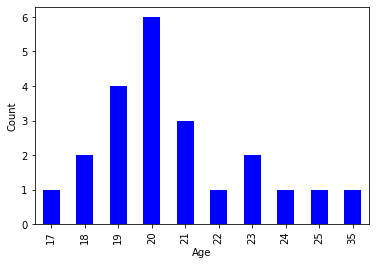

In [42]:
age_plot = age_counts.sort_index().plot.bar(color = 'blue')
age_plot.set(xlabel = "Age", ylabel = "Count")

## Element-wise operations
- Series op scalar

In [43]:
# Let's add 1 to everyone's age
print(ages.value_counts())
ages = ages + 1
print(ages.value_counts())

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64
21    6
20    4
22    3
19    2
24    2
18    1
25    1
26    1
36    1
23    1
dtype: int64


## Boolean indexing

- applying boolean expressions on a Series
- boolean expression will be specified within the pair of [  ]
- Boolean operators:
    - & means 'and'
    - | means 'or'
    - ~ means 'not'
    - we must use () for compound boolean expressions

In [44]:
# Extract only ages > 21

b = ages > 21 # gives you a boolean Series
b

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21     True
dtype: bool

In [45]:
# You can apply boolean Series to the original Series
ages[b] # now you get ages which are greater than 21

7     25
8     26
9     36
10    23
12    22
13    22
15    24
16    24
21    22
dtype: int64

In [46]:
# combining the above two steps
ages[ages > 21]

7     25
8     26
9     36
10    23
12    22
13    22
15    24
16    24
21    22
dtype: int64

### &, |, and ~
- & means 'and'
- | means 'or'
- ~ means 'not'
- we must use () for compound boolean expressions

In [47]:
# ages boolean
# what ages are in the range 18 to 20, inclusive?

print(ages[(ages >= 18) & (ages <= 20)])

# what percentage of students are in this age range?

print(len((ages[(ages >= 18) & (ages <= 20)])) / len(ages))

0     19
1     20
5     18
6     19
17    20
18    20
19    20
dtype: int64
0.3181818181818182


In [48]:
# what percentage of  students are ages 18 OR 21?
print(  len((ages[ (ages == 18) | (ages == 20)]))  /  len(ages) )

# what percentage of students are NOT 19? 
print(len(ages [~(ages == 19)]) / len(ages))

0.22727272727272727
0.9090909090909091


## CS220 information survey data

In [49]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("cs220_survey_data.csv")
header = data[0]
data = data[1:]

In [50]:
header

['Lecture',
 'Age',
 'Primary major',
 'Other majors',
 'Zip Code',
 'Pizza topping',
 'Pet owner',
 'Runner',
 'Sleep habit',
 'Procrastinator']

In [51]:
data[:3]

[['LEC002',
  '19',
  'Engineering: Mechanical',
  '',
  '53711',
  'pepperoni',
  'Yes',
  'No',
  'night owl',
  'Maybe'],
 ['LEC002',
  '20',
  'Science: Physics',
  'Astronomy-Physics, History',
  '53726',
  'pineapple',
  'Yes',
  'Yes',
  'night owl',
  'Yes'],
 ['LEC001',
  '20',
  'Science: Chemistry',
  '',
  '53703',
  'pepperoni',
  'Yes',
  'No',
  'early bird',
  'No']]

In [52]:
# use list comprehension to extract just ages
age_list = [int(row[header.index("Age")]) for row in data if row[header.index("Age")] != ""]
# age_list

In [53]:
cs220_ages = pd.Series(age_list)
cs220_ages

0      19
1      20
2      20
3      19
4      20
       ..
701    22
702    20
703    19
704    21
705    19
Length: 706, dtype: int64

In [54]:
# Make a Series of the counts of all the ages, sorted from most common to least 
# then sort it by index
cs220_ages.value_counts().sort_index()

17      2
18    180
19    226
20    144
21     89
22     25
23     15
24     10
25      4
26      2
27      5
28      1
30      1
31      1
36      1
dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'count')]

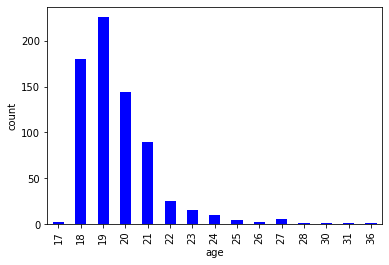

In [55]:
# make a bar chart of the ages sorted by age
age_plot = cs220_ages.value_counts().sort_index().plot.bar(color='blue')
age_plot.set(xlabel = "age", ylabel = "count")

### Statistics

### What is the mode of CS220 student ages?

In [56]:
print(cs220_ages.mode())

0    19
dtype: int64


### What is the 75th percentile of ages?

In [57]:
print(cs220_ages.quantile([.75]))

0.75    20.0
dtype: float64


## Element-wise operations
1. SERIES op SCALAR
2. SERIES op SERIES

In [58]:
## Series from a dict
game1_points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1_points)
game2_points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5, "Meena": 20})
print(game2_points)

Chris      10
Kiara       3
Mikayla     7
Ann         8
Trish       6
dtype: int64
Kiara       7
Chris       3
Trish      11
Mikayla     2
Ann         5
Meena      20
dtype: int64


### Give 2 additional points for every player's game 1 score

In [59]:
game1_points + 2

Chris      12
Kiara       5
Mikayla     9
Ann        10
Trish       8
dtype: int64

In [60]:
game1_points = game1_points + 2
game1_points

Chris      12
Kiara       5
Mikayla     9
Ann        10
Trish       8
dtype: int64

### Give 3 additional points for every player's game 2 score

In [61]:
game2_points += 3
game2_points

Kiara      10
Chris       6
Trish      14
Mikayla     5
Ann         8
Meena      23
dtype: int64

### Compute total of two series

In [62]:
# Pandas can perform operations on two series by matching up their indices
total = game1_points + game2_points
total

Ann        18.0
Chris      18.0
Kiara      15.0
Meena       NaN
Mikayla    14.0
Trish      22.0
dtype: float64

### Who has the highest points?

In [63]:
## Who has the most points?
print(total.max())
print(total.idxmax())

22.0
Trish


In [64]:
print(total['Kiara'], total[2])

15.0 15.0


In [65]:
s = pd.Series([10, 2, 3, 15])
s

0    10
1     2
2     3
3    15
dtype: int64

### Find all values > 8

In [66]:
# gives a boolean Series, where each value is True if the original Series values satifies the condition
b = s > 8
b

0     True
1    False
2    False
3     True
dtype: bool

In [67]:
# now let's apply the boolean expression, which gives a boolean Series
s[b]

0    10
3    15
dtype: int64

In [68]:
# Equivalently, you can directly specify boolean expression inside the [ ]
s[s > 8]

0    10
3    15
dtype: int64

In [69]:
# Decomposing the steps here
# Above example is equivalent to
b = pd.Series([True, False, False, True])
s[b]

0    10
3    15
dtype: int64

### How many students are 25 years or older?

In [70]:
cs220_ages > 25

0      False
1      False
2      False
3      False
4      False
       ...  
701    False
702    False
703    False
704    False
705    False
Length: 706, dtype: bool

In [71]:
cs220_ages[cs220_ages > 25]

32     28
87     36
148    26
151    27
187    26
233    27
234    30
351    27
425    27
510    27
570    31
dtype: int64

In [72]:
print(len(cs220_ages[cs220_ages > 25]))

11


### How many students are in the age range 18 to 20, inclusive?

In [73]:
(cs220_ages >= 18) & (cs220_ages <= 20)

0       True
1       True
2       True
3       True
4       True
       ...  
701    False
702     True
703     True
704    False
705     True
Length: 706, dtype: bool

In [74]:
cs220_ages[(cs220_ages >= 18) & (cs220_ages <= 20)]

0      19
1      20
2      20
3      19
4      20
       ..
699    20
700    19
702    20
703    19
705    19
Length: 550, dtype: int64

In [75]:
len(cs220_ages[(cs220_ages >= 18) & (cs220_ages <= 20)])

550

### What percentage of  students are ages 18 OR 21?

In [76]:
len((cs220_ages[ (cs220_ages == 18) | (cs220_ages == 20)])) / len(cs220_ages)

0.45892351274787535